In [39]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
############# 데이터 불러오기
dat_dir = 'C:/'
dat = pd.read_csv(dat_dir+'loan_data.csv')
dat = dat.drop(['SEX','PAY_METHOD','JOB'], axis = 1)

In [25]:
x,y = dat.drop('TARGET', axis = 1), dat['TARGET']

In [26]:
# 정규화
X = preprocessing.minmax_scale(x)

In [27]:
x.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM'],
      dtype='object')

In [28]:
X = pd.DataFrame(X)
X.columns = x.columns

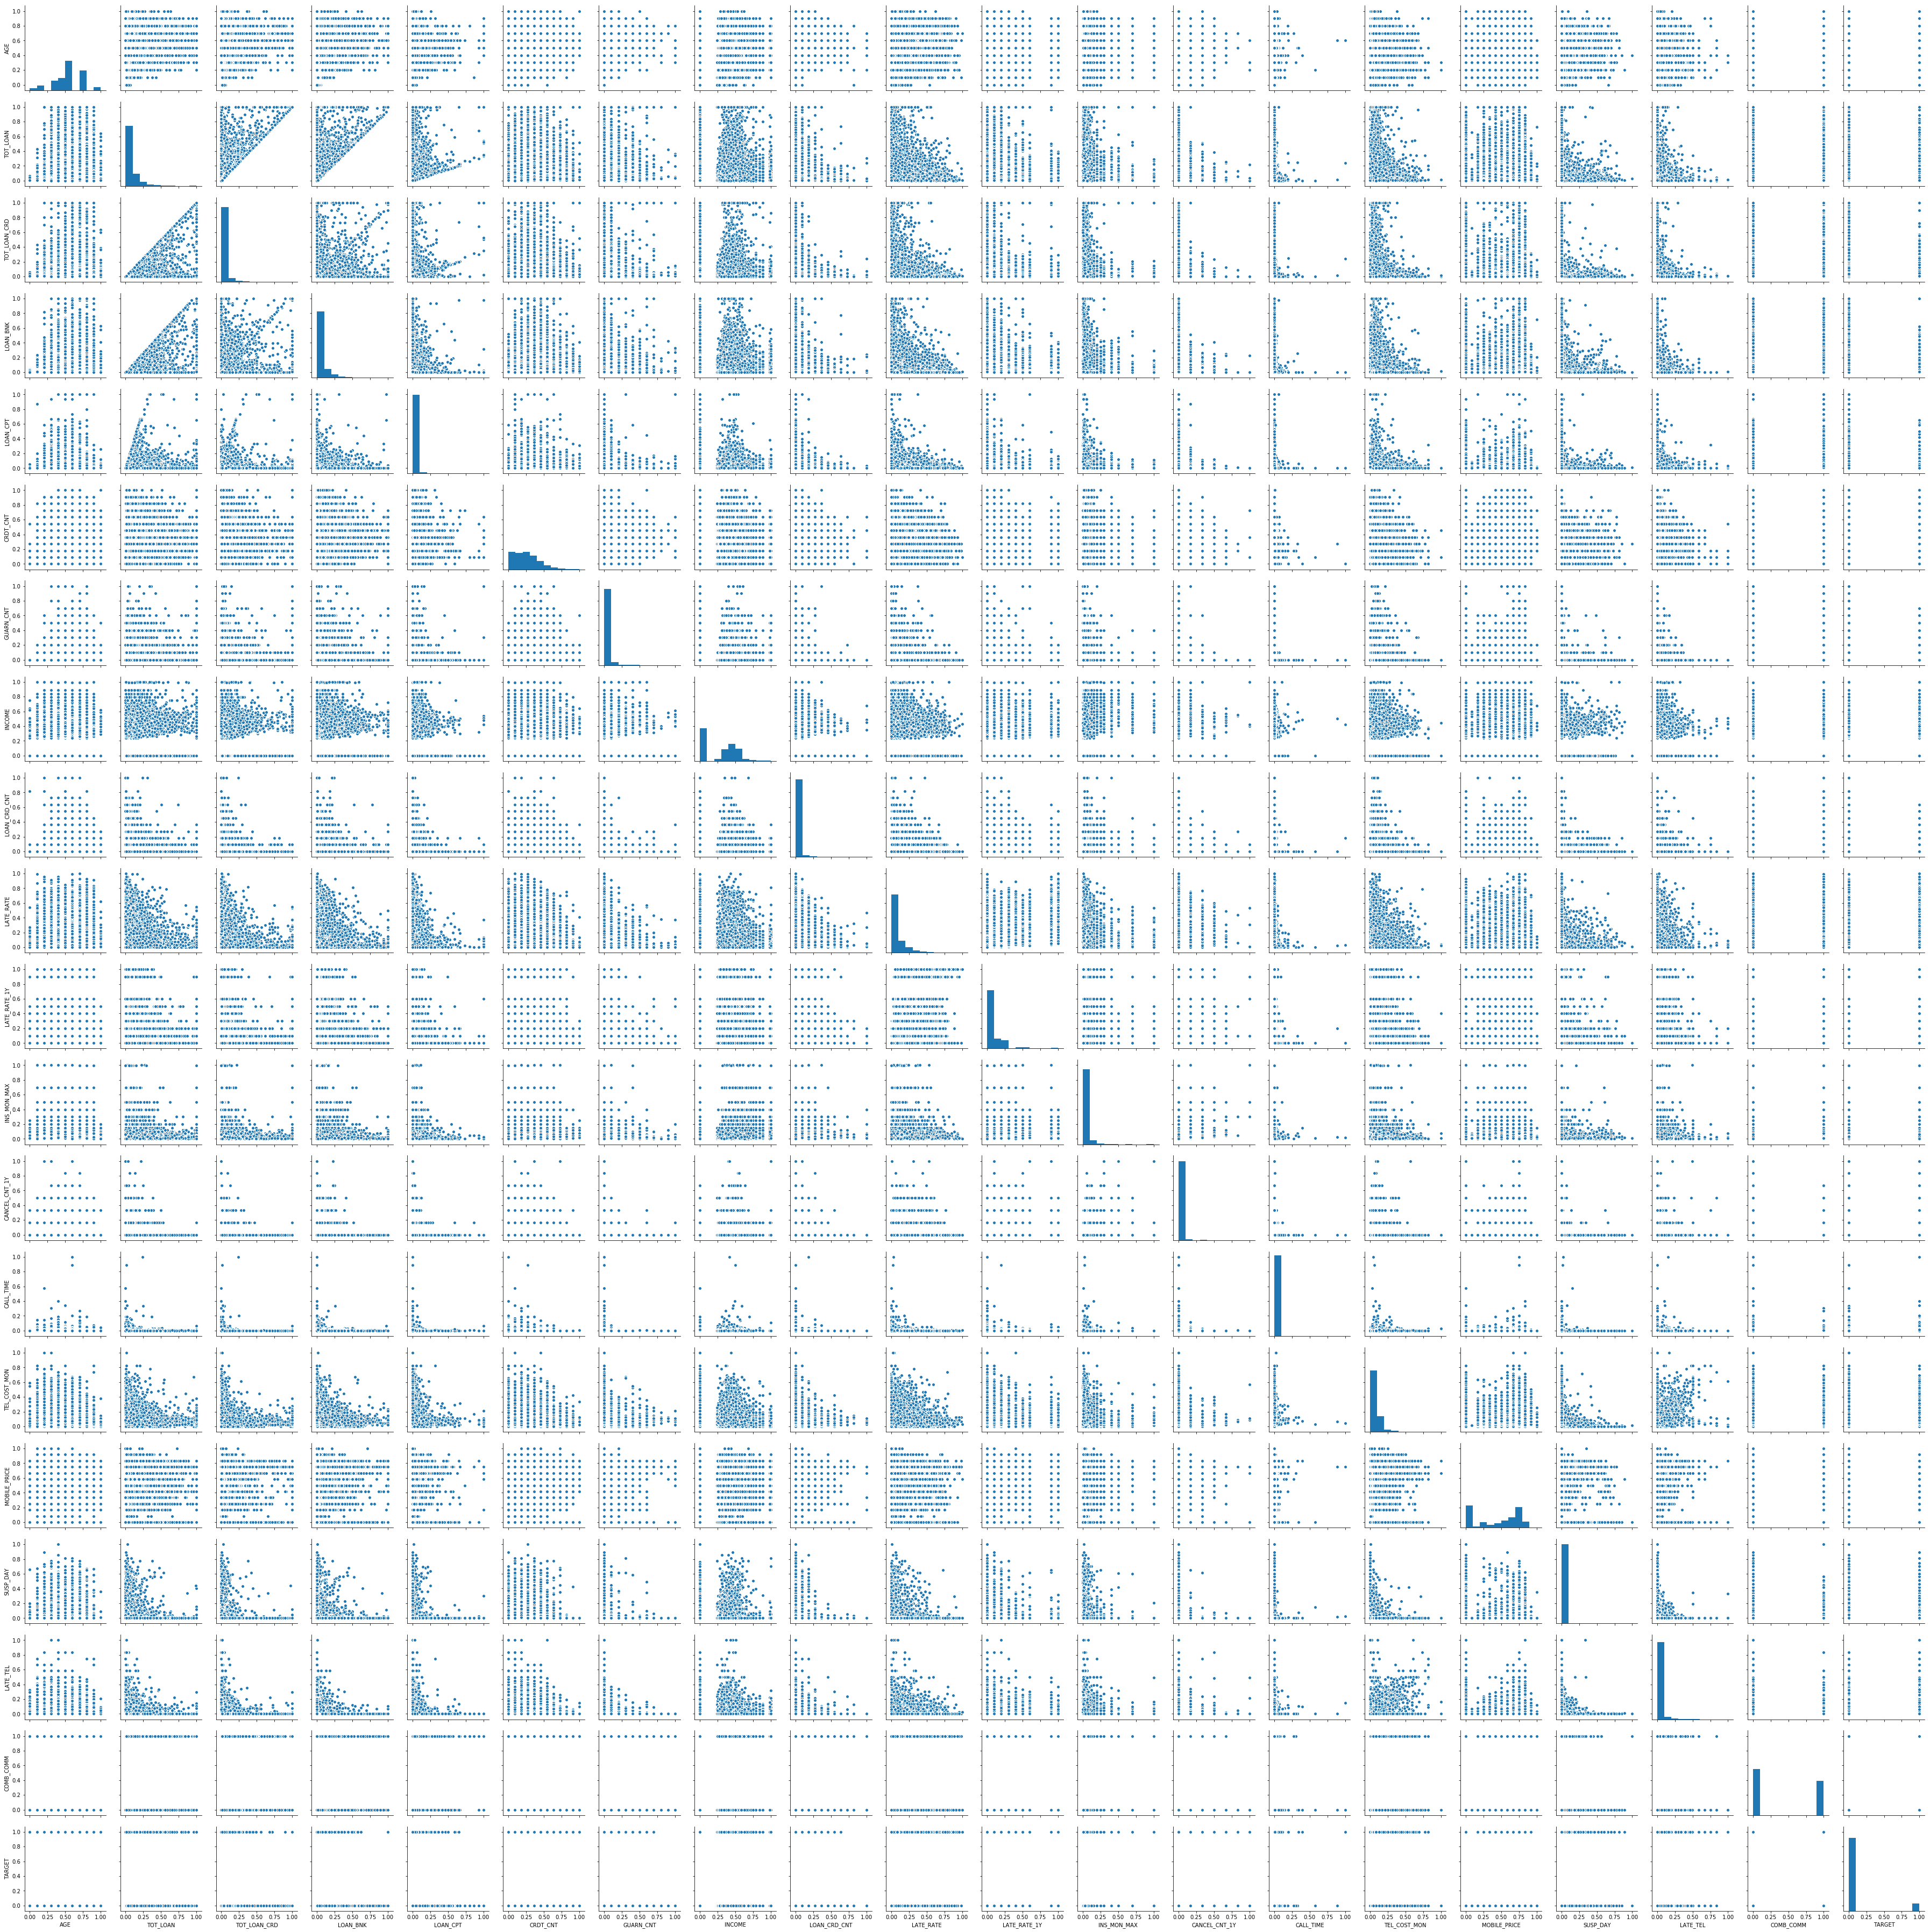

In [8]:
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(X)
plt.show()

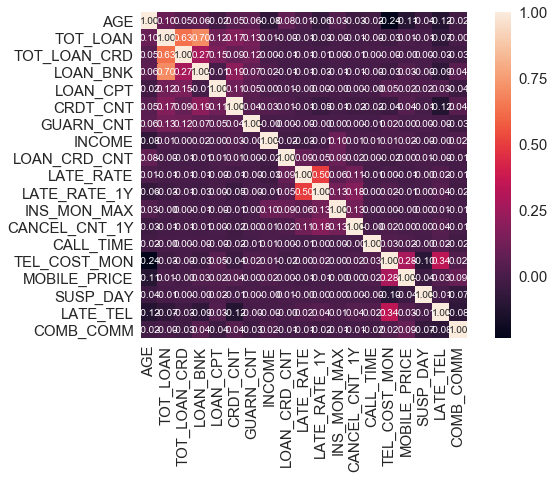

In [29]:
# correlation analysis
colnames = list(X.columns.values)
X_cm = np.corrcoef(X[colnames].values.T)
sns.set(font_scale=1.5)

plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                         annot_kws={'size':10},yticklabels=colnames,xticklabels=colnames)
plt.show()

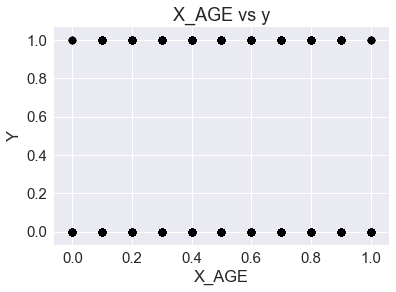

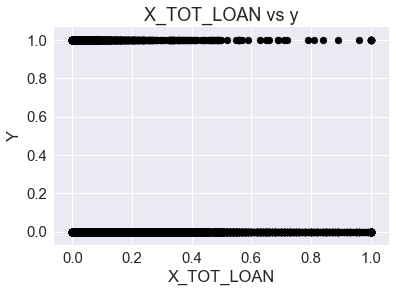

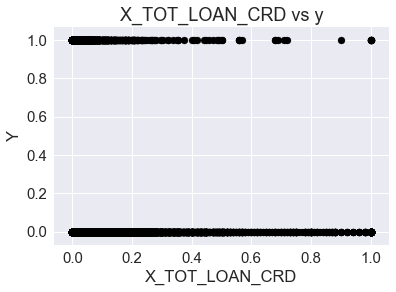

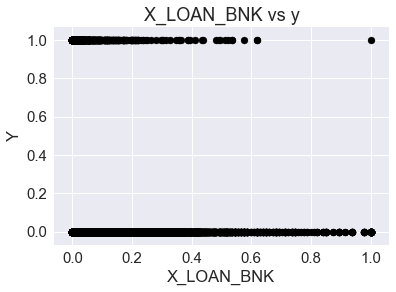

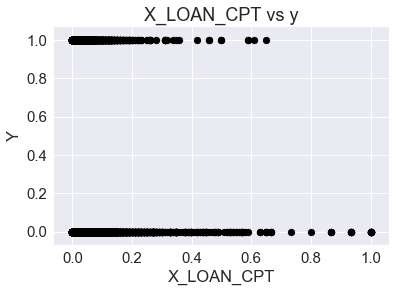

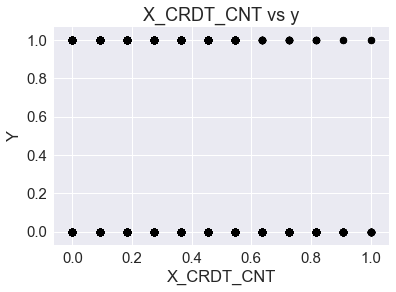

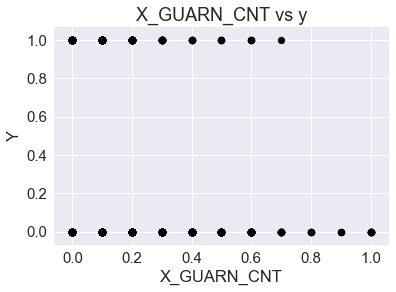

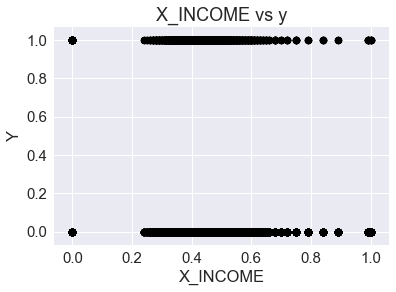

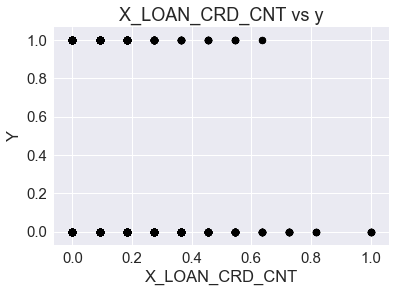

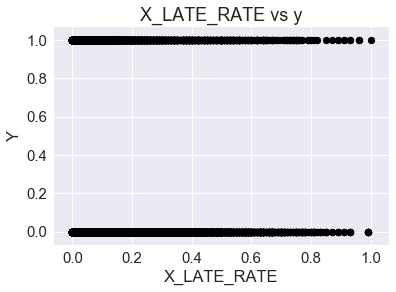

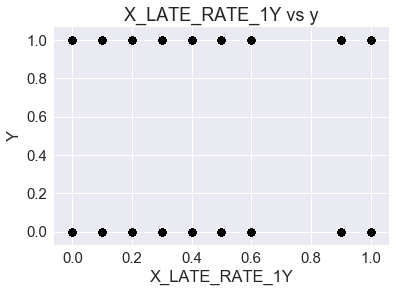

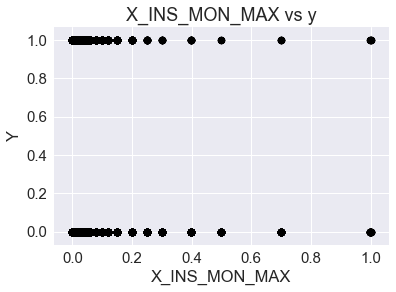

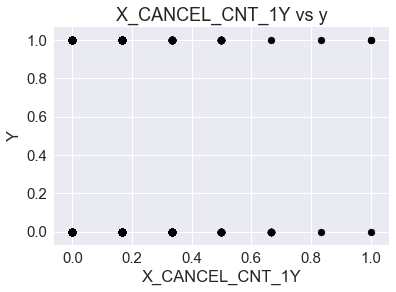

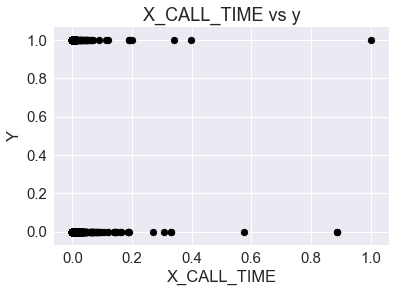

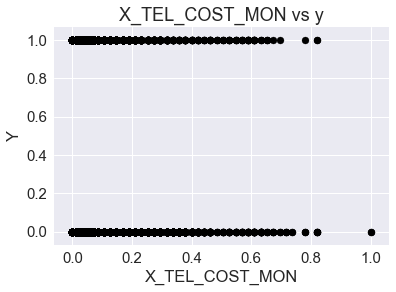

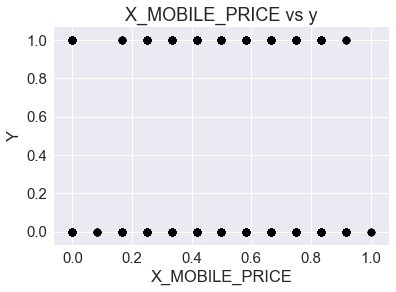

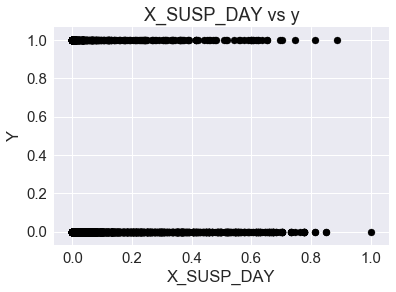

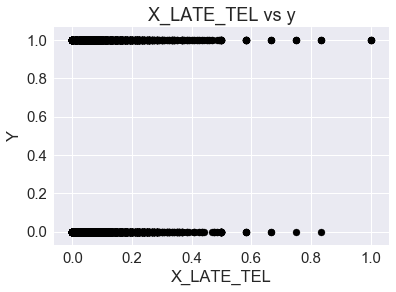

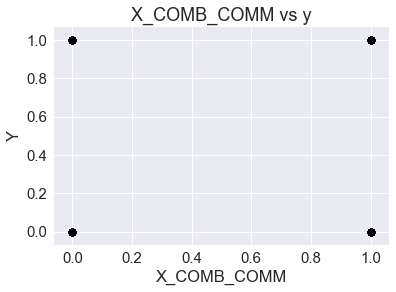

In [30]:
# each X vs Y
for i in range(0,len(colnames)):
    plt.scatter(X.iloc[:,i], y,  color='black')
    plt.title('X_{} vs y'.format(colnames[i]))
    plt.xlabel('X_{}'.format(colnames[i]))
    plt.ylabel('Y')
    plt.show()

In [41]:
############# 학습모델 구축을 위한 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30370, 19) (13016, 19) (30370,) (13016,)


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


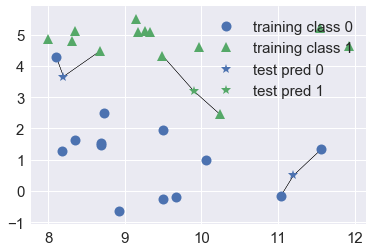

In [60]:
############# 학습모델 구축
lm = sm.OLS(y_train, X_train)
############# 학습모델 구축
knn = KNeighborsClassifier(n_neighbors=1)
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [57]:
############# 모델 학습
lm_trained = lm.fit()
Knnlm_trained = knn.fit(X_train,y_train)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [58]:
###display(lm_trained.summary())
y_pred = clf.predict(X_test)
print("테스트예측값:\n{}".format(y_pred))

테스트예측값:
[0 0 0 ... 0 0 0]


In [59]:
print("테스트 세트의 정확도:{:.2f}".format(clf.score(X_test, y_test)))

테스트 세트의 정확도:0.90


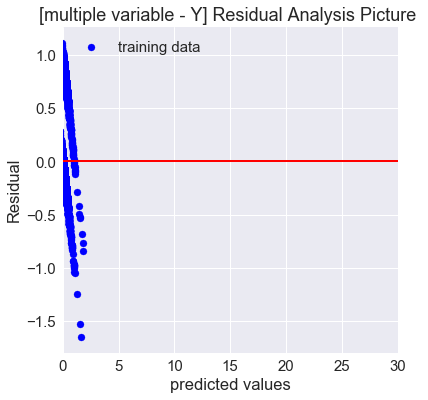

In [36]:
############# 모델 평가
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()
